In [8]:
import os
from dotenv import load_dotenv
from typing import TypedDict, List

from langchain_groq import ChatGroq
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph, END
from browserplugin import Browser
from browsertools import tools
load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")

os.environ.setdefault("LANGSMITH_TRACING", "true")

'true'

In [9]:
browser = Browser()
class AgentState(TypedDict):
    goal: str
    history: List[str]
    observation: str
    steps: int


In [10]:
from langchain_groq import ChatGroq
from langchain.agents import create_agent


llm = ChatGroq(
    model="qwen/qwen3-32b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
    # other params...
)

agent = create_agent(
    model=llm,
    tools=tools,
    system_prompt="""
You are an autonomous browser navigation agent.

Rules:
- Decide ONE action per step
- Use browser tools only
- Stop when the goal is achieved and say "DONE"
- Use CSS selectors when clicking or typing
"""
)


In [12]:
async def agent_node(state: AgentState):
    result = await agent.ainvoke(state)
    return result


# ─────────────────────────────────────────────
# GRAPH
# ─────────────────────────────────────────────
graph = StateGraph(AgentState)
graph.add_node("agent", agent_node)
graph.set_entry_point("agent")
graph.add_edge("agent", END)

app = graph.compile()

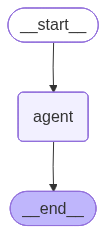

In [ ]:
# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))


In [14]:
# ─────────────────────────────────────────────
# RUN
# ─────────────────────────────────────────────
await browser.start()

initial_state = {
    "goal": "Go to google.com and search for LangGraph",
    "history": [],
    "observation": "",
    "steps": 0
}

result = await app.ainvoke(initial_state)
print(result)

await browser.close()

NotImplementedError: 